# В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

# **Завдання 1.1**

In [4]:
import pandas as pd
medical_df = pd.read_csv('/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [7]:
#1 МНК

#Задаємо вектори

x = non_smoker_df['age'].values.reshape(-1,1)
y = non_smoker_df['charges'].values

#Додаємо колонку одиничок аби задачи bias терм (константу в моделі регресії)

X_b = np.c_[np.ones((x.shape[0],1)), x]

print(f"X вектор: {x}")
print(f"Y вектор: {y}")
print(f"Задаємо bias терм: {X_b}")

X вектор: [[18]
 [28]
 [33]
 ...
 [18]
 [18]
 [21]]
Y вектор: [ 1725.5523   4449.462   21984.47061 ...  2205.9808   1629.8335
  2007.945  ]
Задаємо bias терм: [[ 1. 18.]
 [ 1. 28.]
 [ 1. 33.]
 ...
 [ 1. 18.]
 [ 1. 18.]
 [ 1. 21.]]


**МНК**
`𝑋𝑇𝑋𝜃=𝑋𝑇𝑦 `


---


**Розв'язання для коефіціентів**
`𝜃=(𝑋𝑇𝑋)−1𝑋𝑇𝑦 `

***𝑋𝑇𝑋*** : Транспонована  𝑋 , помножена на  𝑋 .

***𝑋𝑇𝑦*** : Транспонована  𝑋 , помножена на вектор  𝑦





In [8]:
MNK_coefs = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
MNK_coefs

array([-2091.42055657,   267.24891283])

In [9]:
np.dot(X_b[0], MNK_coefs)

np.float64(2719.059874396516)

In [10]:
predictions_MNK = np.dot(X_b, MNK_coefs)
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 array([ 1725.5523 ,  4449.462  , 21984.47061]))

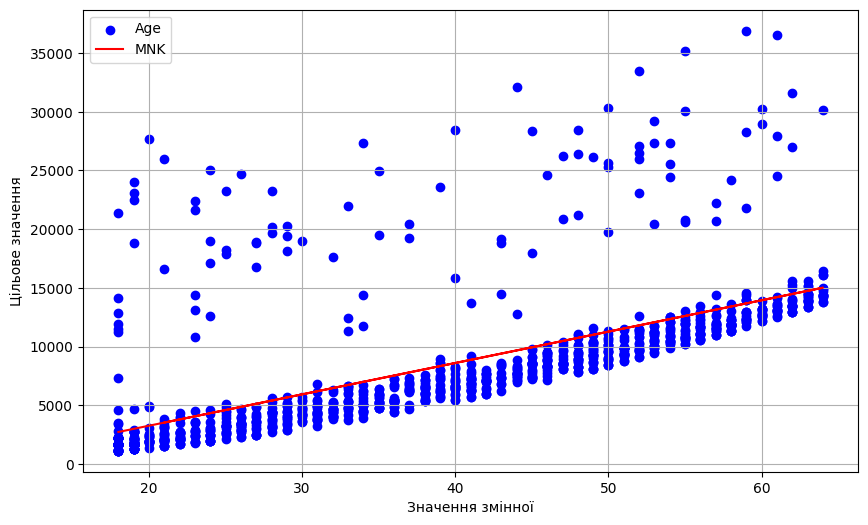

In [11]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], y, color='blue', label='Age')
plt.plot(x[:, 0], predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
#точність прогнозу RMSE
rmse = np.sqrt(np.mean((y - predictions_MNK)**2))
print("RMSE:", rmse)

RMSE: 4662.505766636395


# **Завдання 1.2**

Градієнтний спуск:
m = 267.24891238142834
b = -2091.4205388506907
RMSE = 4662.505766636394


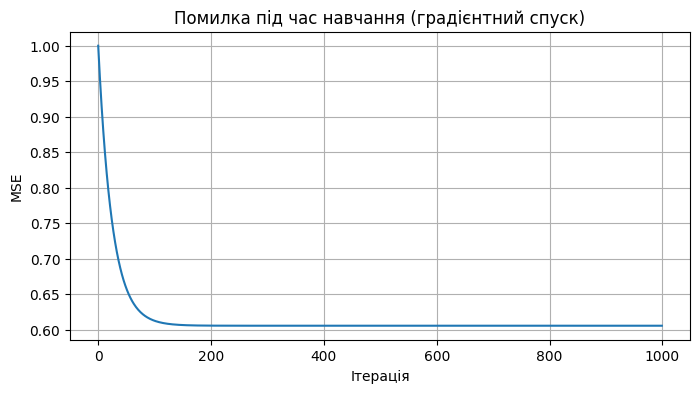

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 1 стандартизація
x_mean, x_std = np.mean(x), np.std(x)
y_mean, y_std = np.mean(y), np.std(y)

x_scaled = (x - x_mean) / x_std
y_scaled = (y - y_mean) / y_std

# 2 Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []

    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(np.mean(error ** 2))  # середній квадрат помилки

        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)

        m -= lr * m_gradient
        b -= lr * b_gradient

    return m, b, errors

# 3 Навчання моделі
m_scaled, b_scaled, errors = full_batch_gradient_descent(x_scaled, y_scaled, lr=0.01, epochs=1000)

# 4 Тепер подивимось на дані в оригінальному середовищи
m_original = m_scaled * (y_std / x_std)
b_original = y_mean - m_original * x_mean

# 5 Побудова передбачень
predictions_fbgd = m_original * x[:, 0] + b_original

# 6 RMSE
rmse_fbgd = np.sqrt(np.mean((y - predictions_fbgd) ** 2))
print("Градієнтний спуск:")
print("m =", m_original)
print("b =", b_original)
print("RMSE =", rmse_fbgd)

# 7 Графік
plt.figure(figsize=(8, 4))
plt.plot(errors)
plt.title("Помилка під час навчання (градієнтний спуск)")
plt.xlabel("Ітерація")
plt.ylabel("MSE")
plt.grid()
plt.show()


# **Завдання 1.3**

In [65]:
!pip install scikit-learn --quiet

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [44]:
X = non_smoker_df['age'].to_frame()  # 2D масив
y = non_smoker_df['charges']

test

In [46]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [48]:
w = model.coef_[0]       # нахил
b = model.intercept_     # intercept

print(f"y = {w:.2f} * age + {b:.2f}")

y = 267.25 * age + -2091.42


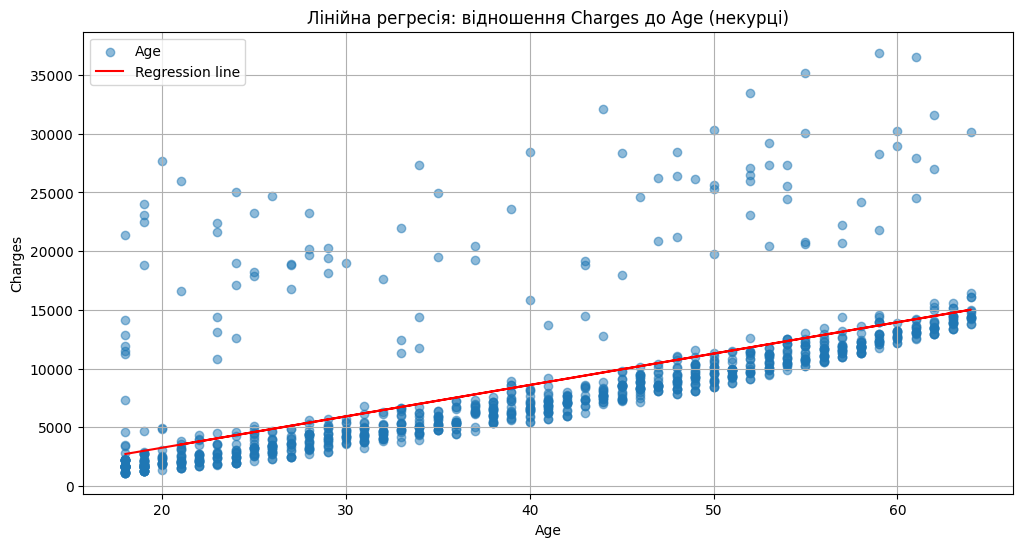

In [61]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.5, label='Age')
plt.plot(X, model.predict(X), color='red', label='Regression line')
#plt.plot(X, predictions_fbgd, color='green', label='full_batch_gradient_descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.title('Лінійна регресія: відношення Charges до Age (некурці)')
plt.show()

In [79]:
lin_reg

LinearRegression()

In [80]:
lin_reg.fit(X, y)

LinearRegression()

In [81]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [82]:
predictions_sklearn = lin_reg.predict(X)

In [87]:
print('RMSE МНК: ', rmse)

rmse_sgd = np.sqrt(mean_squared_error(y, predictions_fbgd))
print('RMSE град. спуску: ', rmse_sgd)

rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE град. спуску:  4662.505766636394
RMSE sklearn:  4662.505766636395


# Висновок
На останньому графіку ми бачимо, що лінії накладаються одна на одну(full_batch_gradient_descent закоментила, щоб було видно що накладається). Тому для досколаного порівняння ми зазвичай порівнюємо на метриках.
По метрикам ми бачимо, що RMSE показує середню помилку прогнозу.
Full-Batch показав теж саме, що і МНК

# **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [88]:
yes_smoker_df = medical_df[medical_df.smoker == 'yes']
yes_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [89]:
X = yes_smoker_df['age'].to_frame()  # 2D масив
y = yes_smoker_df['charges']

In [90]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [94]:
w = model.coef_[0]
b = model.intercept_

print(f"Коефіцієнт : {w}")
print(f"intercept : {b}")

Коефіцієнт : 305.2376021098288
intercept : 20294.128126915966


In [95]:
r_squared = model.score(X, y)
print(f"Точність моделі (R²): {r_squared}")

Точність моделі (R²): 0.13558924096084068


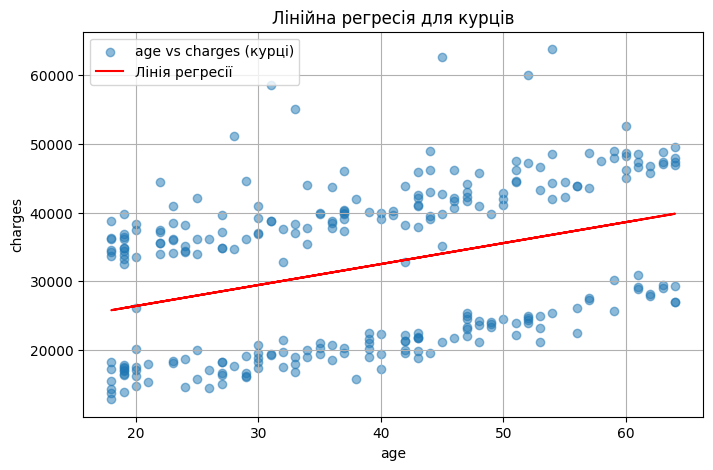

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.5, label='age vs charges (курці)')
plt.plot(X, model.predict(X), color='red', label='Лінія регресії')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Лінійна регресія для курців')
plt.legend()
plt.grid(True)
plt.show()


Висновок:
Точність моделі (R²): 0.13558924096084068, що каже нам про те, що модель є слабкою та ми не можемо точно сказати, що вік має сильний вплив медичні витрати. Точність моделі низька і я б не рекомендувала її для використання у компанії